In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
# load the dataframe with assigned ratio on A, B, and X site
df = pd.read_csv('Final_Ratio_dataframe.csv')

In [90]:
# use the ratio of first compound to represent the pair
# for instance MA/FA = 0.17 means MA/FA = 0.17/0.83
# the total ratio of each pair for A, B, and X sites should all equal to 1
df.head()

,MA/FA,MA,Al/MA,FA/Cs,MA/Cs,FA,MA/HA,FA/Rb,Cs,MA/Ag,...,Sn,Ge,Cu,I/Br,I,I/SCN,I/Cl,Br,Cl/Br,PCE
0,0.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.83,NaN,NaN,NaN,NaN,NaN,13.4
1,0.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.83,NaN,NaN,NaN,NaN,NaN,12.9
2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,13.2
3,NaN,NaN,0.075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,13.6
4,NaN,NaN,0.150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,15.8


In [91]:
# replace NA with 0
df1 = df.fillna(0)
df1.head()

,MA/FA,MA,Al/MA,FA/Cs,MA/Cs,FA,MA/HA,FA/Rb,Cs,MA/Ag,...,Sn,Ge,Cu,I/Br,I,I/SCN,I/Cl,Br,Cl/Br,PCE
0,0.17,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.83,0.0,0.0,0.0,0.0,0.0,13.4
1,0.17,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.83,0.0,0.0,0.0,0.0,0.0,12.9
2,0.00,1.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,13.2
3,0.00,0.0,0.075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,13.6
4,0.00,0.0,0.150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,15.8


In [92]:
# replce all non-zero values to 1 except last 'PCE' column
df2 = df1.drop('PCE', axis=1)
df2[df2 != 0] = 1
df2.head()

,MA/FA,MA,Al/MA,FA/Cs,MA/Cs,FA,MA/HA,FA/Rb,Cs,MA/Ag,...,Pb/Zn,Sn,Ge,Cu,I/Br,I,I/SCN,I/Cl,Br,Cl/Br
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [93]:
df2['PCE'] = df1.PCE
df2.head()

,MA/FA,MA,Al/MA,FA/Cs,MA/Cs,FA,MA/HA,FA/Rb,Cs,MA/Ag,...,Sn,Ge,Cu,I/Br,I,I/SCN,I/Cl,Br,Cl/Br,PCE
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,13.4
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.9
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,13.2
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,13.6
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,15.8


In [94]:
df1.head()

,MA/FA,MA,Al/MA,FA/Cs,MA/Cs,FA,MA/HA,FA/Rb,Cs,MA/Ag,...,Sn,Ge,Cu,I/Br,I,I/SCN,I/Cl,Br,Cl/Br,PCE
0,0.17,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.83,0.0,0.0,0.0,0.0,0.0,13.4
1,0.17,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.83,0.0,0.0,0.0,0.0,0.0,12.9
2,0.00,1.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,13.2
3,0.00,0.0,0.075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,13.6
4,0.00,0.0,0.150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,15.8


In [95]:
len(df1)

303

In [96]:
list(df1)

['MA/FA',
 'MA',
 'Al/MA',
 'FA/Cs',
 'MA/Cs',
 'FA',
 'MA/HA',
 'FA/Rb',
 'Cs',
 'MA/Ag',
 'MA/EA',
 'FA/PEA',
 'MA/EDA',
 'Pb',
 'Pb/Sn',
 'Pb/Sb',
 'Pb/Co',
 'Pb/Cu',
 'Pb/Fe',
 'Pb/Mg',
 'Pb/Mn',
 'Pb/Ni',
 'Pb/Sr',
 'Pb/Zn',
 'Sn',
 'Ge',
 'Cu',
 'I/Br',
 'I',
 'I/SCN',
 'I/Cl',
 'Br',
 'Cl/Br',
 'PCE']

In [97]:
df1.as_matrix

<bound method NDFrame.as_matrix of      MA/FA   MA  Al/MA  FA/Cs  MA/Cs   FA  MA/HA  FA/Rb   Cs  MA/Ag  ...    \
0     0.17  0.0  0.000   0.00   0.00  0.0    0.0    0.0  0.0    0.0  ...     
1     0.17  0.0  0.000   0.00   0.00  0.0    0.0    0.0  0.0    0.0  ...     
2     0.00  1.0  0.000   0.00   0.00  0.0    0.0    0.0  0.0    0.0  ...     
3     0.00  0.0  0.075   0.00   0.00  0.0    0.0    0.0  0.0    0.0  ...     
4     0.00  0.0  0.150   0.00   0.00  0.0    0.0    0.0  0.0    0.0  ...     
5     0.00  0.0  0.300   0.00   0.00  0.0    0.0    0.0  0.0    0.0  ...     
6     0.00  0.0  0.750   0.00   0.00  0.0    0.0    0.0  0.0    0.0  ...     
7     0.00  0.0  1.500   0.00   0.00  0.0    0.0    0.0  0.0    0.0  ...     
8     0.00  0.0  0.000   0.83   0.00  0.0    0.0    0.0  0.0    0.0  ...     
9     0.00  1.0  0.000   0.00   0.00  0.0    0.0    0.0  0.0    0.0  ...     
10    0.00  1.0  0.000   0.00   0.00  0.0    0.0    0.0  0.0    0.0  ...     
11    0.00  1.0  0.000   0.00

In [98]:
y=df1['PCE'].values
y

array([  1.34000000e+01,   1.29000000e+01,   1.32000000e+01,
         1.36000000e+01,   1.58000000e+01,   1.42000000e+01,
         9.80000000e+00,   5.50000000e+00,   1.68000000e+01,
         7.50000000e+00,   1.12000000e+01,   1.58000000e+01,
         1.38000000e+01,   4.60000000e+00,   1.01000000e+01,
         1.09000000e+01,   3.38000000e+00,   6.59000000e+00,
         5.24000000e+00,   7.59000000e+00,   4.74000000e+00,
         8.25000000e+00,   6.50000000e+00,   6.50000000e+00,
         5.94000000e+00,   1.78000000e+01,   1.83000000e+01,
         1.70000000e+01,   1.59000000e+01,   1.49000000e+01,
         1.45000000e+01,   1.49000000e+01,   1.59000000e+01,
         1.27000000e+01,   1.45700000e+01,   1.52700000e+01,
         1.55800000e+01,   1.57800000e+01,   1.64800000e+01,
         1.56700000e+01,   1.39700000e+01,   1.56400000e+01,
         1.62000000e+01,   1.37200000e+01,   1.10100000e+01,
         8.80000000e+00,   1.05000000e+01,   1.11000000e+01,
         3.50000000e+00,

In [99]:
tmpdf1=df1.drop(['PCE'],axis=1)
X=tmpdf1.as_matrix()

In [100]:
print (type(X))
print (X.shape)
print (y.shape)

<class 'numpy.ndarray'>
(303, 33)
(303,)


In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.10)

In [103]:
y_test

array([  0.06 ,   9.95 ,  11.4  ,  12.8  ,  18.8  ,   7.8  ,  16.6  ,
        20.   ,  14.2  ,  15.78 ,   0.68 ,  17.5  ,   5.5  ,   8.7  ,
         3.4  ,   5.46 ,   6.2  ,  17.11 ,   7.7  ,   1.75 ,  10.9  ,
        10.5  ,  12.4  ,  13.8  ,   1.081,  18.02 ,  17.5  ,   3.85 ,
         3.83 ,  15.3  ,   5.5  ])

In [104]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [105]:
y_train.ravel()

array([  6.04000000e+00,   1.30000000e+01,   1.85000000e+01,
         1.78000000e+00,   1.03000000e+01,   2.30000000e+00,
         7.60000000e+00,   1.43500000e+01,   1.50800000e+01,
         1.21000000e+01,   1.33000000e+01,   8.20000000e+00,
         3.30000000e+00,   1.16000000e+01,   1.03000000e+01,
         1.56900000e+01,   7.90000000e+00,   8.80000000e+00,
         5.24000000e+00,   1.58000000e+01,   1.74000000e+00,
         6.10000000e+00,   1.92000000e+01,   1.60000000e+01,
         5.60000000e+00,   1.04000000e+01,   1.13700000e+01,
         8.37000000e+00,   1.57300000e+01,   1.11100000e+01,
         8.90000000e+00,   1.90000000e+00,   1.70000000e-02,
         1.38700000e+01,   1.66800000e+01,   1.55100000e+01,
         1.40500000e+01,   1.17000000e+01,   1.82000000e+01,
         9.29000000e+00,   4.27000000e+00,   1.39700000e+01,
         1.55000000e+01,   1.00000000e+01,   5.73000000e+00,
         7.11000000e+00,   1.40700000e+01,   1.71600000e+01,
         3.50000000e+00,

In [106]:
lasso = Lasso(alpha=0.001, fit_intercept=True, normalize=False, precompute=False,
              copy_X=True, max_iter=10000, tol=0.00001, positive=False, random_state=None, selection='cyclic')

In [107]:
alphas = np.array([0.1,0.01,0.001,0.0001])

In [108]:
gs = GridSearchCV(lasso, param_grid=dict(alpha=alphas))

In [109]:
gs.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=1e-05, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([ 0.1   ,  0.01  ,  0.001 ,  0.0001])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

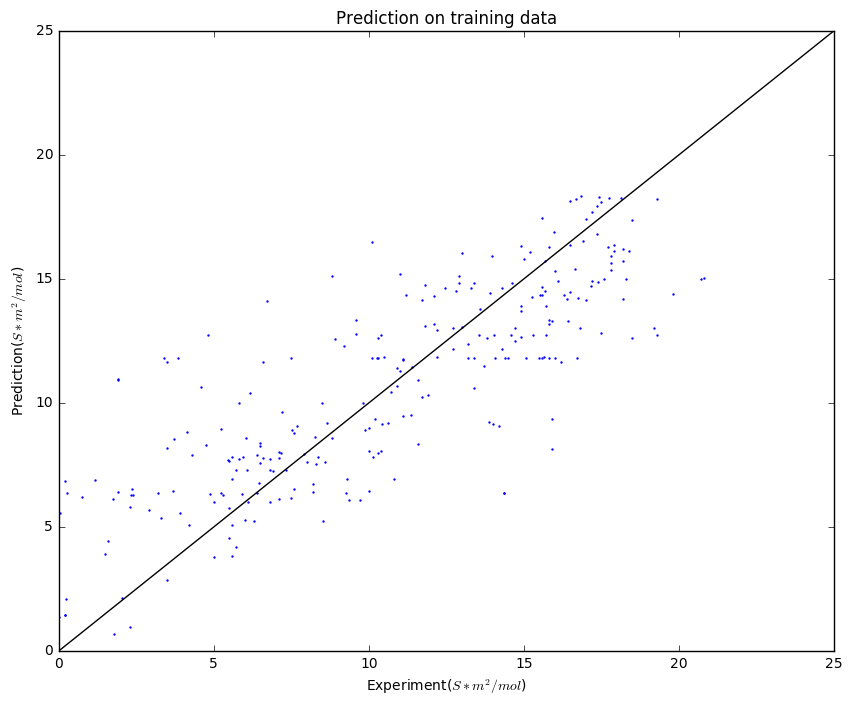

In [110]:
lasso.alpha_ = gs.best_params_['alpha']
obj=lasso.fit(X_train,y_train)
predict_train=obj.predict(X_train)

# make the plot of prediction on training data
plt.figure(figsize=(10,8))
plt.scatter(y_train,predict_train,s=0.5,color='blue')
plt.title('Prediction on training data')
plt.plot(np.linspace(0,25,1000),np.linspace(0,25,1000),color='black')
plt.xlim((0,25))
plt.ylim((0,25))
plt.xlabel("Experiment($S*m^2/mol$)")
plt.ylabel("Prediction($S*m^2/mol$)")

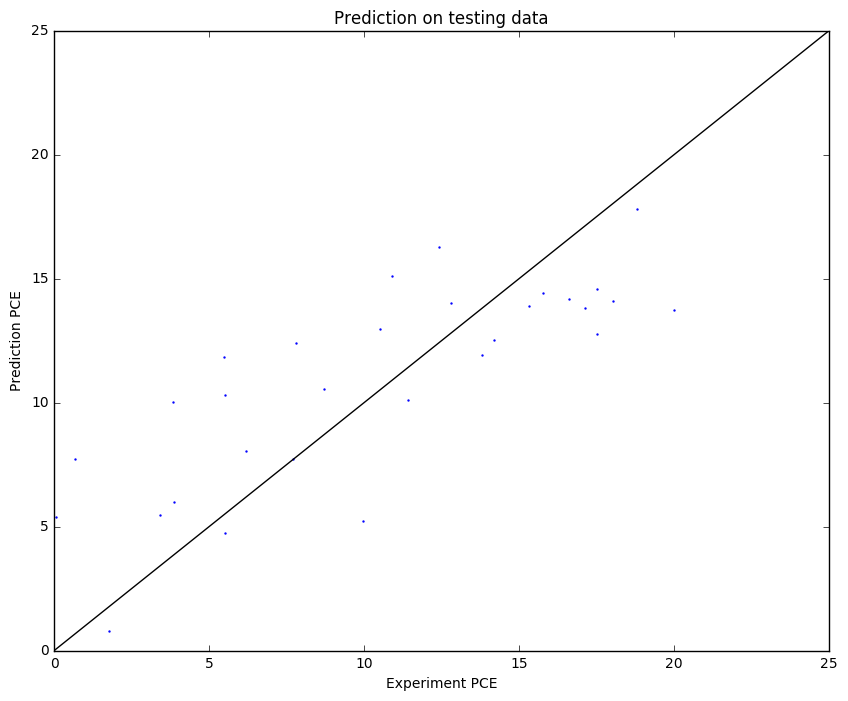

In [111]:
predict_test=obj.predict(X_test)

# make the plot of predition on testing data
plt.figure(figsize=(10,8))
plt.scatter(y_test,predict_test,s=0.5,color='blue')
plt.title('Prediction on testing data')
plt.plot(np.linspace(0,25,1000),np.linspace(0,25,1000),color='black')
plt.xlim((0,25))
plt.ylim((0,25))
plt.xlabel("Experiment PCE")
plt.ylabel("Prediction PCE")

In [112]:
lasso.alpha

0.001

In [113]:
lasso.get_params

<bound method BaseEstimator.get_params of Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=1e-05, warm_start=False)>

In [114]:
lasso.score(X_train,y_train)

0.6826229817615832

In [115]:
lasso.score(X_test,y_test)

0.62674993812820179

In [60]:
rdata1 = pd.read_csv('reduced_coefficient_3.csv')

In [61]:
rdata1.head()

,MA/FA,MA,Al/MA,FA/Cs,MA/Cs,FA,MA/EA,Pb,Pb/Sn,Sn,I/Br,I,I/SCN,I/Cl,Br,PCE
0,0.17,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.83,NaN,NaN,NaN,NaN,13.4
1,0.17,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.83,NaN,NaN,NaN,NaN,12.9
2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,13.2
3,NaN,NaN,0.075,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,13.6
4,NaN,NaN,0.150,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,15.8


In [62]:
rdata1 = rdata1.fillna(0)
rdata1.head()

,MA/FA,MA,Al/MA,FA/Cs,MA/Cs,FA,MA/EA,Pb,Pb/Sn,Sn,I/Br,I,I/SCN,I/Cl,Br,PCE
0,0.17,0.0,0.000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.83,0.0,0.0,0.0,0.0,13.4
1,0.17,0.0,0.000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.83,0.0,0.0,0.0,0.0,12.9
2,0.00,1.0,0.000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,13.2
3,0.00,0.0,0.075,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,13.6
4,0.00,0.0,0.150,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,15.8


In [63]:
XX=rdata1.drop(['PCE'],axis=1).as_matrix()
yy=rdata1['PCE'].values

In [64]:
type(XX)

numpy.ndarray

In [65]:
print (XX.shape)
print (yy.shape)

(222, 15)
(222,)


In [66]:
XX_train,XX_test,yy_train,yy_test = train_test_split(XX,yy,test_size=0.10)

In [67]:
yy_train.ravel()

array([  3.68,  14.2 ,   7.32,  10.  ,   5.9 ,  20.7 ,  10.9 ,   3.5 ,
         8.25,  13.  ,   7.53,  15.51,  15.73,   6.2 ,  10.3 ,   8.  ,
         7.5 ,  14.01,   6.9 ,   5.  ,  13.8 ,  11.8 ,   4.2 ,   8.8 ,
        18.14,  14.19,  14.5 ,  17.4 ,  15.78,  18.3 ,   2.36,   4.6 ,
        17.2 ,  16.68,   5.48,  13.97,  15.3 ,  12.7 ,   6.7 ,  15.01,
         5.  ,  12.2 ,  16.  ,   7.1 ,  14.57,   1.9 ,   3.5 ,  16.48,
        16.48,   5.7 ,  16.42,   6.3 ,   4.74,   5.24,  13.87,  18.2 ,
        12.1 ,  11.01,  15.3 ,  10.7 ,   5.3 ,   3.83,  11.4 ,  11.7 ,
         5.8 ,   6.5 ,   5.8 ,   3.5 ,  10.1 ,  17.5 ,   2.38,   8.5 ,
         3.85,  16.2 ,  17.35,  11.9 ,  15.8 ,   3.9 ,  14.35,  11.2 ,
        12.1 ,  14.7 ,   4.8 ,   9.6 ,  18.2 ,  15.58,   9.25,  15.8 ,
         3.85,  11.7 ,  17.  ,  14.35,  13.4 ,   9.2 ,   7.1 ,   5.6 ,
         9.6 ,   5.73,  16.84,  17.35,  13.4 ,   5.5 ,   1.9 ,  15.5 ,
         6.07,  18.02,  14.9 ,  10.3 ,   5.5 ,   8.2 ,   2.32,   2.3 ,
      

In [68]:
yy_test.ravel()

array([ 11.1 ,  17.41,  17.2 ,   5.6 ,  19.2 ,  10.5 ,  15.9 ,  11.  ,
        20.8 ,  20.  ,  12.7 ,  16.1 ,  17.8 ,  15.27,  15.08,   7.6 ,
         2.9 ,   8.8 ,  10.4 ,  11.4 ,  16.  ,  16.6 ,   4.89])

In [69]:
lasso = Lasso(alpha=0.001, fit_intercept=True, normalize=False, precompute=False,
        copy_X=True, max_iter=10000, tol=0.00001, positive=False, random_state=None, selection='cyclic')

In [70]:
lasso.fit(XX_train,yy_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=1e-05, warm_start=False)

In [71]:
predict_XX_train = lasso.predict(XX_train)
predict_XX_test=lasso.predict(XX_test)

In [72]:
lasso.score(XX_train,yy_train)

0.60402612463882654

In [73]:
lasso.score(XX_test,yy_test)

0.63582746847064853

In [74]:
lasso.coef_

array([  1.25675263,  -2.4430199 ,  -5.45726909,   1.95027939,
        -2.94735381,  -1.39542431,  -3.28255771,   1.13093331,
        -5.24855749,  -4.09416295,  15.77046159,  12.53379392,
         8.68375158,  17.28910783,   5.60970507])

In [75]:
list(rdata1)

['MA/FA',
 'MA',
 'Al/MA',
 'FA/Cs',
 'MA/Cs',
 'FA',
 'MA/EA',
 'Pb',
 'Pb/Sn',
 'Sn',
 'I/Br',
 'I',
 'I/SCN',
 'I/Cl',
 'Br',
 'PCE']

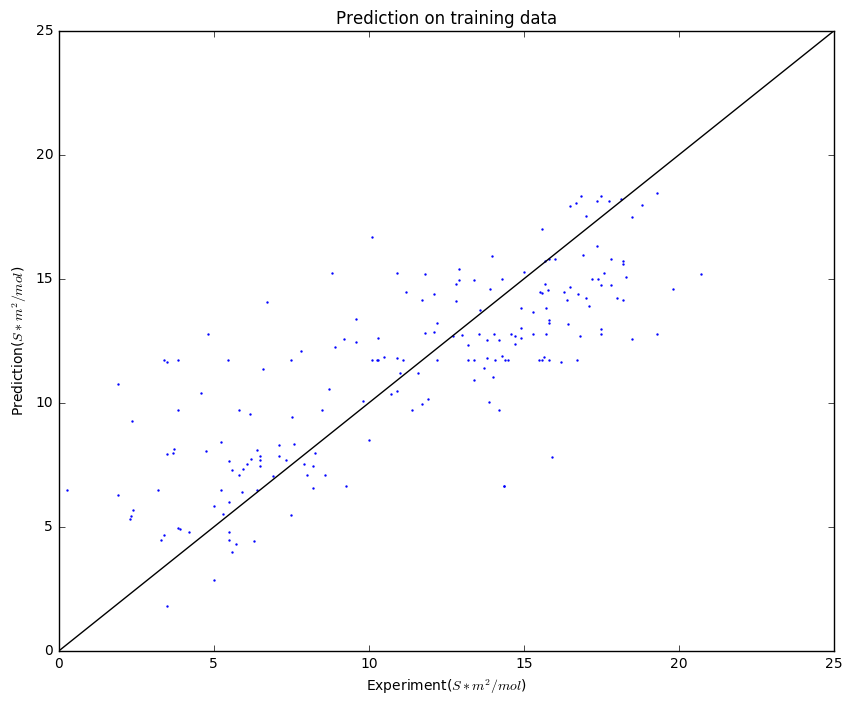

In [76]:
plt.figure(figsize=(10,8))
plt.scatter(yy_train,predict_XX_train,s=0.5,color='blue')
plt.title('Prediction on training data')
plt.plot(np.linspace(0,25,1000),np.linspace(0,25,1000),color='black')
plt.xlim((0,25))
plt.ylim((0,25))
plt.xlabel("Experiment($S*m^2/mol$)")
plt.ylabel("Prediction($S*m^2/mol$)")

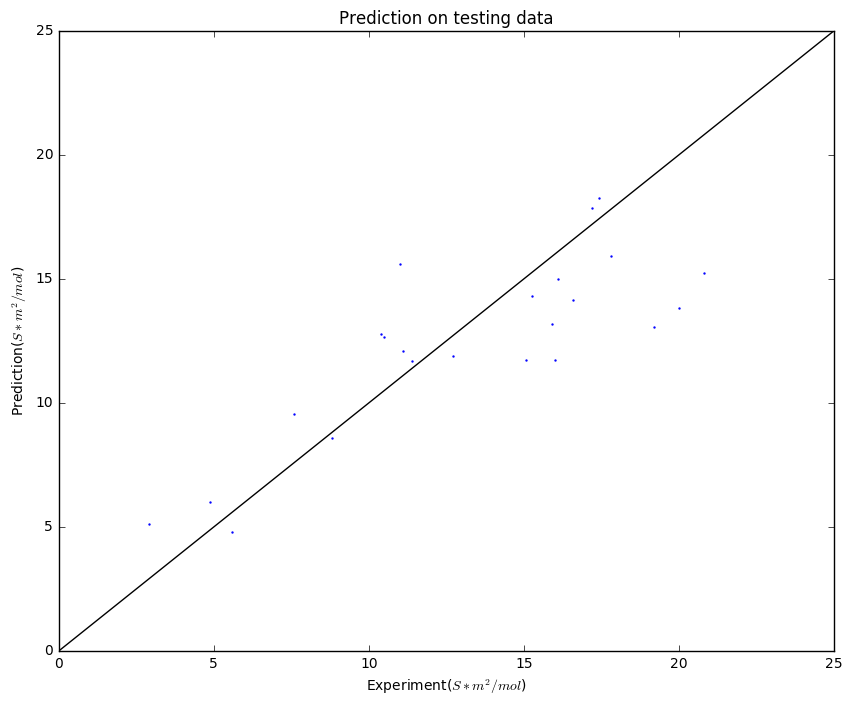

In [77]:
plt.figure(figsize=(10,8))
plt.scatter(yy_test,predict_XX_test,s=0.5,color='blue')
plt.title('Prediction on testing data')
plt.plot(np.linspace(0,25,1000),np.linspace(0,25,1000),color='black')
plt.xlim((0,25))
plt.ylim((0,25))
plt.xlabel("Experiment($S*m^2/mol$)")
plt.ylabel("Prediction($S*m^2/mol$)")

In [78]:
from sklearn.svm import SVR

In [79]:
svr = SVR(kernel='rbf', C=1e3, degree=2)

In [80]:
svr.fit(XX_train,yy_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [81]:
svr.score(XX_train,yy_train)

0.62723092565103822

In [82]:
svr.score(XX_test,yy_test)

0.65471025473286648

In [83]:
predict_XX_train = svr.predict(XX_train)

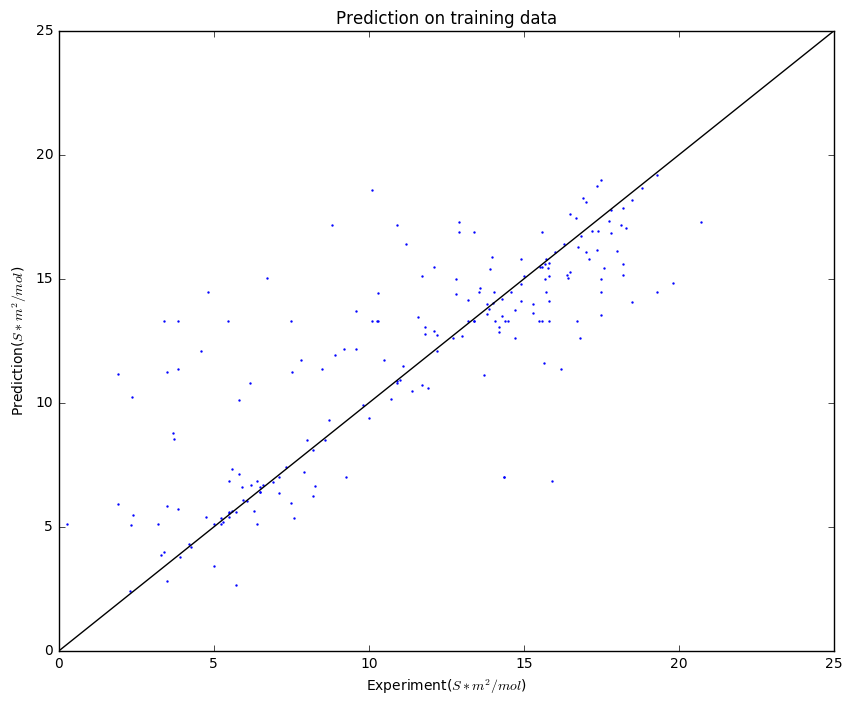

In [84]:
plt.figure(figsize=(10,8))
plt.scatter(yy_train,predict_XX_train,s=0.5,color='blue')
plt.title('Prediction on training data')
plt.plot(np.linspace(0,25,1000),np.linspace(0,25,1000),color='black')
plt.xlim((0,25))
plt.ylim((0,25))
plt.xlabel("Experiment($S*m^2/mol$)")
plt.ylabel("Prediction($S*m^2/mol$)")

In [85]:
predict_XX_test = svr.predict(XX_test)

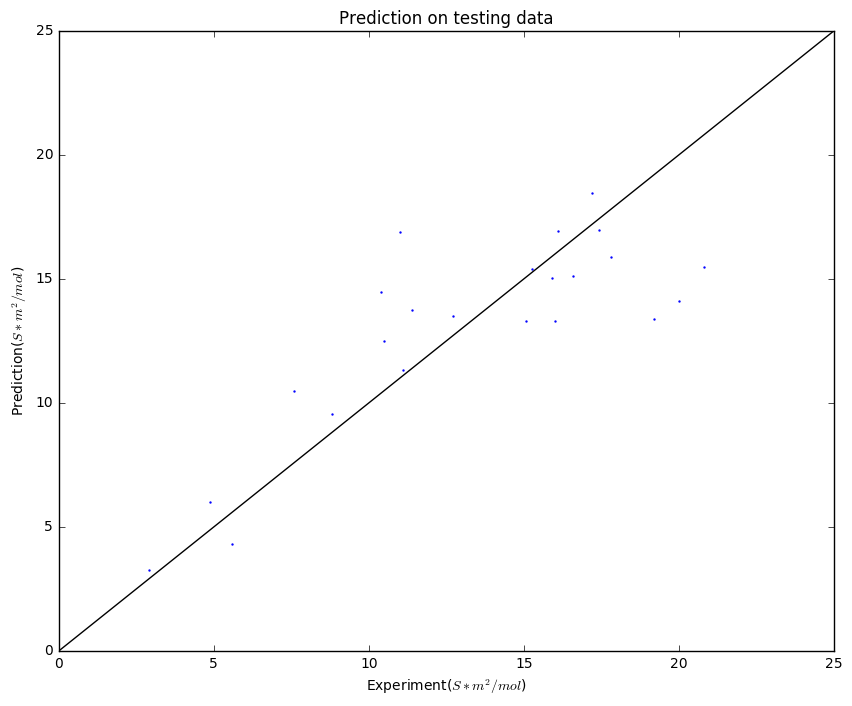

In [86]:
plt.figure(figsize=(10,8))
plt.scatter(yy_test,predict_XX_test,s=0.5,color='blue')
plt.title('Prediction on testing data')
plt.plot(np.linspace(0,25,1000),np.linspace(0,25,1000),color='black')
plt.xlim((0,25))
plt.ylim((0,25))
plt.xlabel("Experiment($S*m^2/mol$)")
plt.ylabel("Prediction($S*m^2/mol$)")

In [121]:
comb = pd.read_csv('contributors.csv')
comb = comb.fillna(0)
combx = comb.drop(['PCE','Pb'],axis=1).as_matrix()
comb.head()

,MA/FA,Pb,I/Br,PCE
0,0.17,1.0,0.83,13.4
1,0.17,1.0,0.83,12.9
2,1.00,1.0,1.00,13.2
3,1.00,1.0,1.00,7.5
4,1.00,1.0,0.97,11.2


In [122]:
comby = comb['PCE'].values

In [123]:
svr = SVR(kernel='rbf', C=1e3, gamma=10000000)

In [124]:
svr.fit(combx,comby)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma=10000000, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
  verbose=False)

In [125]:
svr.score(combx,comby)

0.39752713893842673

In [126]:
predict_combx = svr.predict(combx)

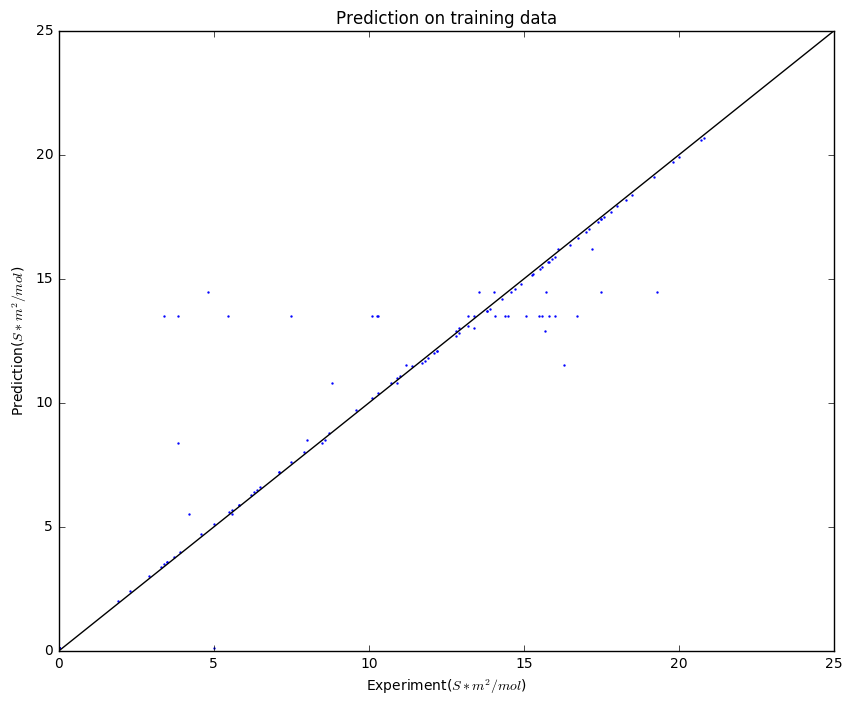

In [127]:
plt.figure(figsize=(10,8))
plt.scatter(comby,predict_combx,s=0.5,color='blue')
plt.title('Prediction on training data')
plt.plot(np.linspace(0,25,1000),np.linspace(0,25,1000),color='black')
plt.xlim((0,25))
plt.ylim((0,25))
plt.xlabel("Experiment($S*m^2/mol$)")
plt.ylabel("Prediction($S*m^2/mol$)")